In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
cell_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv')
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
cell_df['Class'].unique()
cell_df.shape

(699, 11)

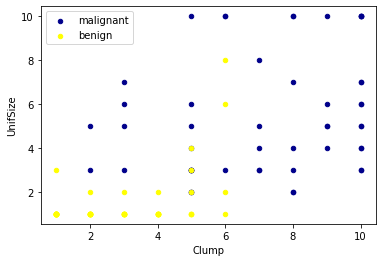

In [6]:
 ax = cell_df[cell_df['Class']==4][0:50].plot(kind='scatter',x='Clump', y='UnifSize',color = 'DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind = 'scatter' , x='Clump', y='UnifSize',color = 'Yellow', label='benign',ax = ax);
plt.show()

In [7]:
# Data pre-processing and selection
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [8]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [10]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asanyarray(feature_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [11]:
y = np.asanyarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [12]:
# train test split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 4)
print('train set :',x_train.shape , y_train.shape)
print('test set :',x_test.shape, y_test.shape)

train set : (546, 9) (546,)
test set : (137, 9) (137,)


In [13]:
# modeling svm using scikit-learn
from sklearn import svm
clf = svm.SVC(kernel = 'rbf') #rbf = radial basis function
clf.fit(x_train , y_train)

SVC()

In [15]:
yhat = clf.predict(x_test)
yhat[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

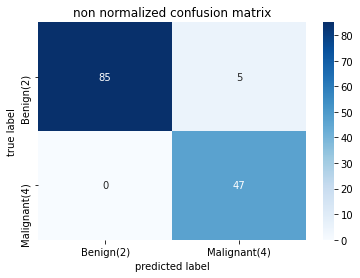

In [18]:
# evaluation
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test , yhat , labels = [2,4])
import seaborn as sns
sns.heatmap(cm , cmap = 'Blues' , xticklabels = ['Benign(2)','Malignant(4)'],yticklabels = ['Benign(2)','Malignant(4)'],annot = True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('non normalized confusion matrix')
plt.show()

In [17]:
print(classification_report(y_test , yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [22]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat,pos_label=2)

0.9714285714285714